In [2]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

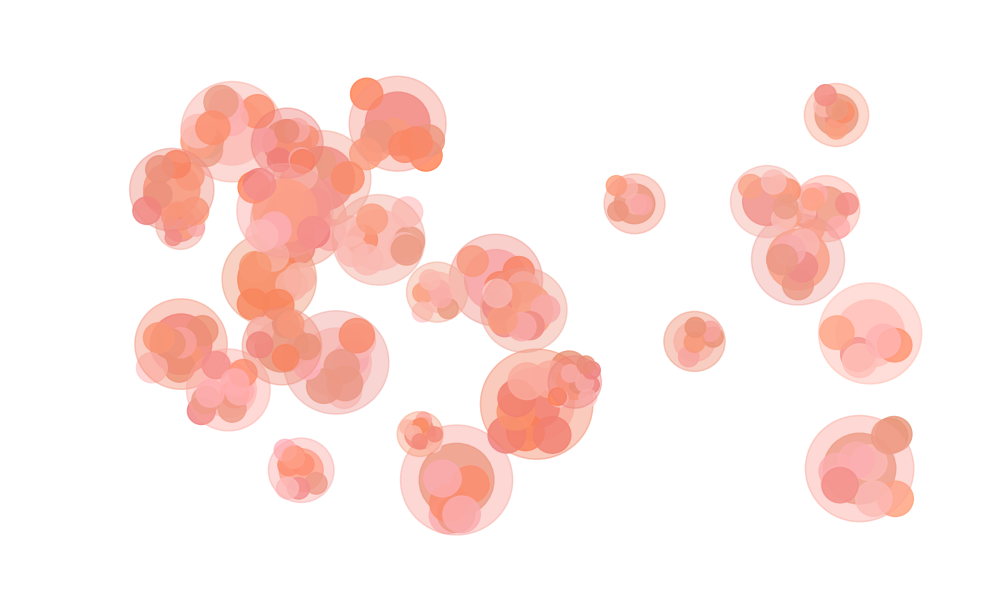

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import PathPatch
import numpy as np
from matplotlib.path import Path
from matplotlib.transforms import Affine2D

# Set the seed for reproducibility
np.random.seed(42)

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.axis('off')  # Turn off the axis

# Define colors with varying alpha for a glowing effect
colors = ['#ffcccb', '#ffb6c1', '#ffa07a', '#ff7f50', '#f08080', '#e9967a']

# Function to create a barnacle
def create_barnacle(x, y, size):
    # Create a base circle
    base_circle = patches.Ellipse(
        (x, y), width=size, height=size, fill=True, color=np.random.choice(colors), alpha=0.8)
    ax.add_patch(base_circle)
    
    # Create multiple circles on top of the base to represent the barnacle structure
    for _ in range(np.random.randint(5, 10)):
        offset_x = np.random.uniform(-size/2, size/2)
        offset_y = np.random.uniform(-size/2, size/2)
        circle = patches.Ellipse(
            (x+offset_x, y+offset_y), width=size/2, height=size/2, fill=True, color=np.random.choice(colors), alpha=0.8)
        ax.add_patch(circle)
    
    # Add glow to the barnacle
    for _ in range(5):
        glow = patches.Ellipse(
            (x, y), width=size*1.5, height=size*1.5, fill=True, color=np.random.choice(colors), alpha=0.1)
        ax.add_patch(glow)

# Create multiple barnacles with random positions, sizes, and rotations
for _ in range(30):
    x = np.random.uniform(1, 9)
    y = np.random.uniform(1, 5)
    size = np.random.uniform(0.3, 0.8)
    create_barnacle(x, y, size)

# Display the plot
plt.tight_layout()
plt.show()


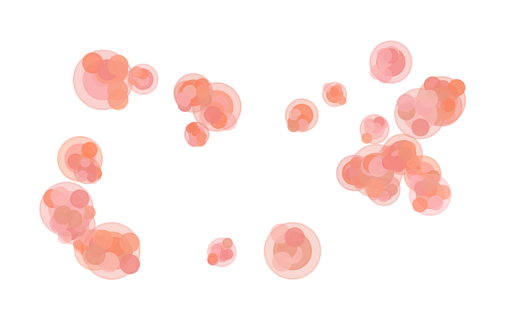

In [4]:
from matplotlib.animation import FuncAnimation, PillowWriter

# Initialize the plot for animation
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.axis('off')

# Modify create_barnacle function to return created patches
def create_barnacle(x, y, size):
    patches_list = []
    # Create a base circle
    base_circle = patches.Ellipse(
        (x, y), width=size, height=size, fill=True, color=np.random.choice(colors), alpha=0.8)
    ax.add_patch(base_circle)
    patches_list.append(base_circle)
    
    # Create multiple circles on top of the base to represent the barnacle structure
    for _ in range(np.random.randint(5, 10)):
        offset_x = np.random.uniform(-size/2, size/2)
        offset_y = np.random.uniform(-size/2, size/2)
        circle = patches.Ellipse(
            (x+offset_x, y+offset_y), width=size/2, height=size/2, fill=True, color=np.random.choice(colors), alpha=0.8)
        ax.add_patch(circle)
        patches_list.append(circle)
    
    # Add glow to the barnacle
    for _ in range(5):
        glow = patches.Ellipse(
            (x, y), width=size*1.5, height=size*1.5, fill=True, color=np.random.choice(colors), alpha=0.1)
        ax.add_patch(glow)
        patches_list.append(glow)
    
    return patches_list


# Initialize barnacle patches list
ln = []

def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    return ln

def update(frame):
    x = np.random.uniform(1, 9)
    y = np.random.uniform(1, 5)
    size = np.random.uniform(0.3, 0.8)
    new_barnacles = create_barnacle(x, y, size)
    ln.extend(new_barnacles)
    return ln

# Create an animation of glowing barnacles
anim = FuncAnimation(fig, update, frames=np.arange(30), init_func=init, blit=True)

# Save the animation as a GIF file
filename = "spawning_barnacles_animation.gif"
anim.save(filename, writer=PillowWriter(fps=5))





'glowing_barnacle_animation.gif'

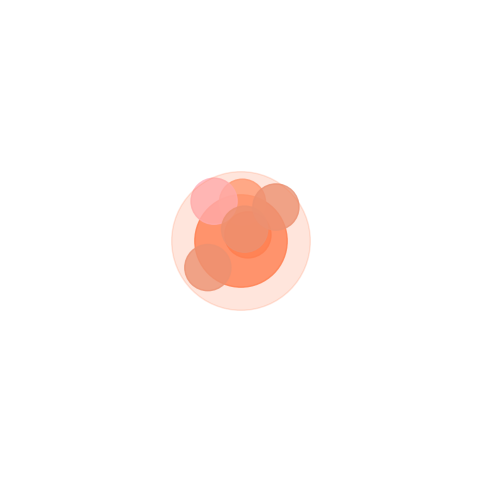

In [10]:
def create_single_barnacle(x, y, size):
    patches_list = []
    # Create a base circle
    base_circle = patches.Ellipse(
        (x, y), width=size, height=size, fill=True, color=np.random.choice(colors), alpha=0.8)
    ax.add_patch(base_circle)
    patches_list.append(base_circle)
    
    # Create multiple circles on top of the base to represent the barnacle structure
    for _ in range(np.random.randint(5, 10)):
        offset_x = np.random.uniform(-size/2, size/2)
        offset_y = np.random.uniform(-size/2, size/2)
        circle = patches.Ellipse(
            (x + offset_x, y + offset_y), width=size / 2, height=size / 2, fill=True,
            color=np.random.choice(colors), alpha=0.8)
        ax.add_patch(circle)
        patches_list.append(circle)
    
    return patches_list

# Initialize the plot for the most simplified animation
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect('equal')
ax.axis('off')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Initialize barnacles and glows list with one element
barnacles = []
glows = []

# Create one barnacle and its corresponding glow
x = 5  # Center of the plot
y = 5  # Center of the plot
size = 2  # Standard size
barnacle_patches = create_single_barnacle(x, y, size)
barnacles.extend(barnacle_patches)

# Create one glow for the barnacle and add to glows list
glow = patches.Ellipse(
    (x, y), width=size * 1.5, height=size * 1.5, fill=True, color=barnacle_patches[0].get_facecolor(), alpha=0.1)
ax.add_patch(glow)
glows.append(glow)

# Few frames for the animation
frames = np.arange(20)  # Few frames

def init():
    return barnacles + glows


def update(frame):
    # Directly change the alpha value to create a glow effect
    alpha = 0.1 if frame % 2 == 0 else 0.2  # Change alpha directly
    glow.set_alpha(alpha)
    return barnacles + glows


# Create the most simplified animation of one glowing barnacle with few frames
anim_most_simplified = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True)

# Save the most simplified animation as a GIF file
filename_most_simplified_glow = "glowing_barnacle_animation.gif"
anim_most_simplified.save(filename_most_simplified_glow, writer=PillowWriter(fps=5))

# Display the path to the saved GIF file
filename_most_simplified_glow
